Importing libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import pickle

Loading the dataset

In [50]:
data = pd.read_csv("/content/healthcare-stroke-data.csv")

### Step 1: Exploratory Data Analysis (EDA)

In [51]:
print("Dataset Overview:")
print(data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5110 non-null   int64  
 1   gender               5110 non-null   object 
 2   age                  5110 non-null   float64
 3   hypertension         5110 non-null   int64  
 4   heart_disease        5110 non-null   int64  
 5   ever_married         5110 non-null   object 
 6   work_type            4929 non-null   object 
 7   Residence_type       5110 non-null   object 
 8   avg_glucose_level    5110 non-null   float64
 9   bmi                  4909 non-null   float64
 10  smoking_status       5110 non-null   object 
 11  stroke               5110 non-null   int64  
 12  high_blood_pressure  3589 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 519.1+ KB
None


In [52]:
# Descriptive Statistics
print("Descriptive Statistics:")
data.describe().T

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00
high_blood_pressure,3589.0,0.195319,0.396501,0.00,0.000,0.000,0.00,1.00


Visualizing Missing Values

In [53]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print("Missing Values (%):")
print(missing_percentage)

Missing Values (%):
id                      0.000000
gender                  0.000000
age                     0.000000
hypertension            0.000000
heart_disease           0.000000
ever_married            0.000000
work_type               3.542074
Residence_type          0.000000
avg_glucose_level       0.000000
bmi                     3.933464
smoking_status          0.000000
stroke                  0.000000
high_blood_pressure    29.765166
dtype: float64


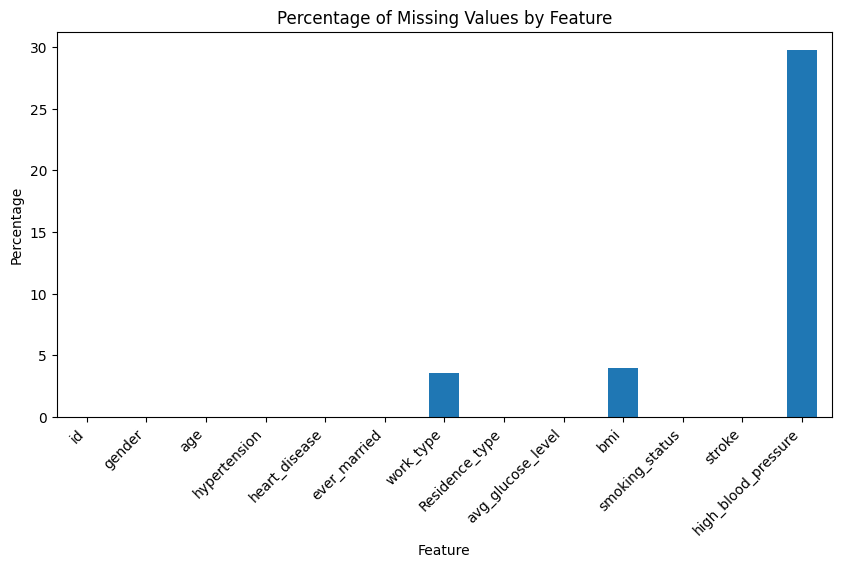

In [54]:
plt.figure(figsize=(10, 5))
missing_percentage.plot(kind='bar')
plt.title("Percentage of Missing Values by Feature")
plt.ylabel("Percentage")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.show()

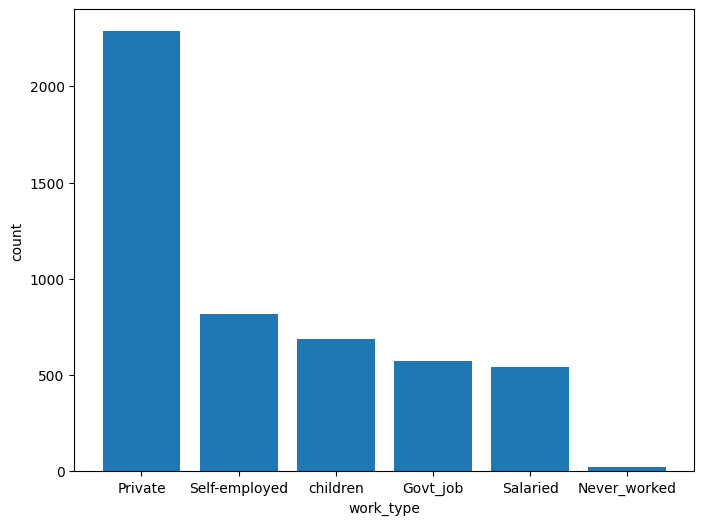

In [55]:
work_type_counts = data["work_type"].value_counts()
plt.figure(figsize = (8,6))
plt.bar(work_type_counts.index , work_type_counts.values)
plt.xlabel("work_type")
plt.ylabel("count")
plt.show()

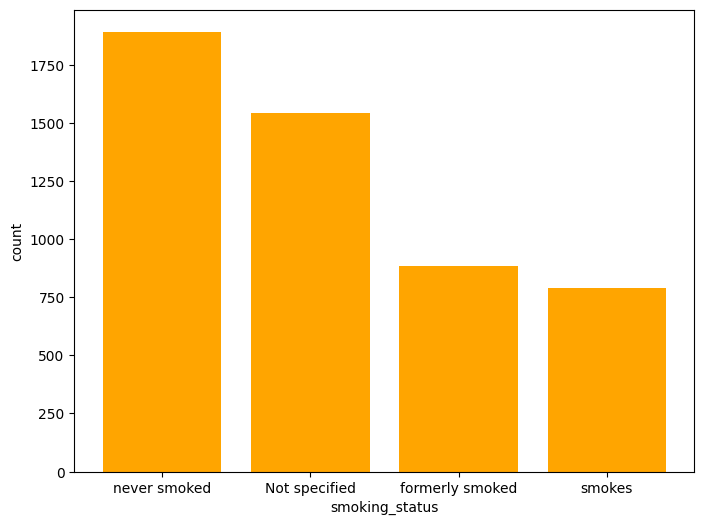

In [56]:
smoking_status_counts = data["smoking_status"].value_counts()
plt.figure(figsize=(8,6))
plt.bar(smoking_status_counts.index , smoking_status_counts.values , color = "orange" )
plt.xlabel("smoking_status")
plt.ylabel("count")
plt.show()

<Figure size 800x600 with 0 Axes>

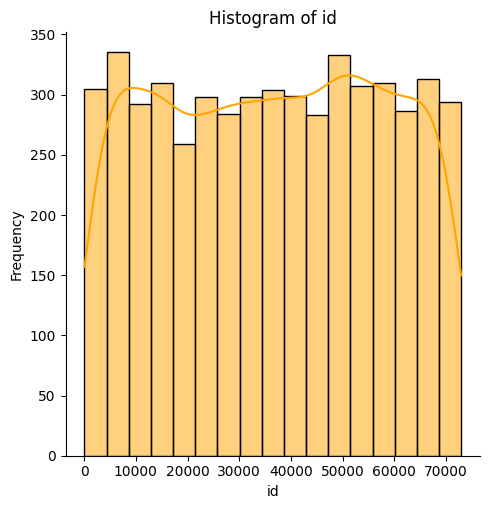

<Figure size 800x600 with 0 Axes>

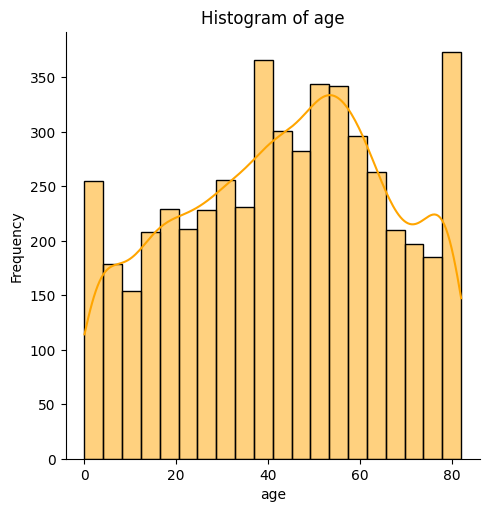

<Figure size 800x600 with 0 Axes>

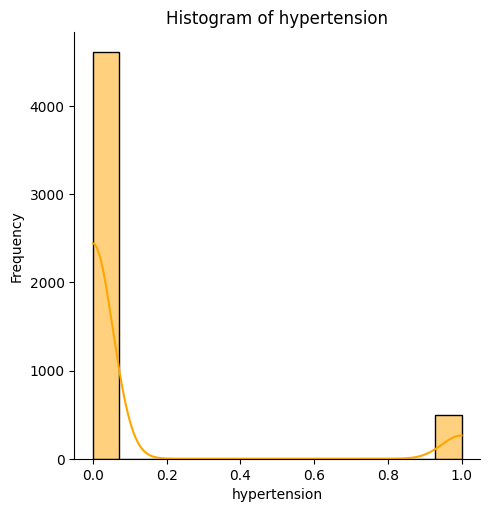

<Figure size 800x600 with 0 Axes>

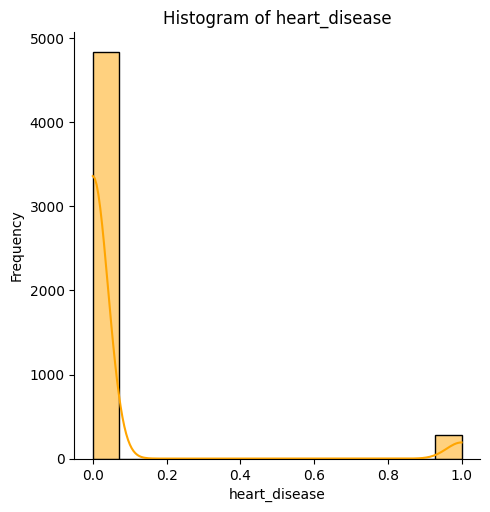

<Figure size 800x600 with 0 Axes>

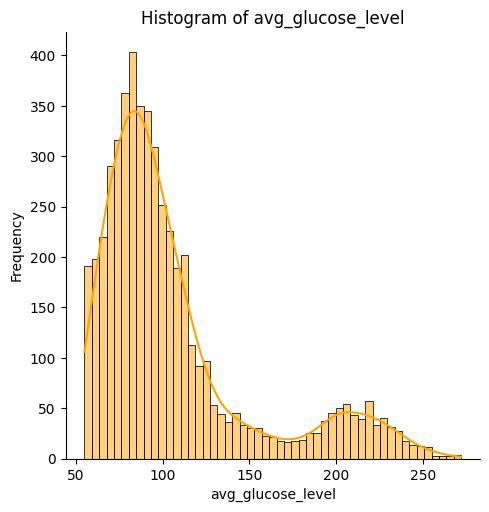

<Figure size 800x600 with 0 Axes>

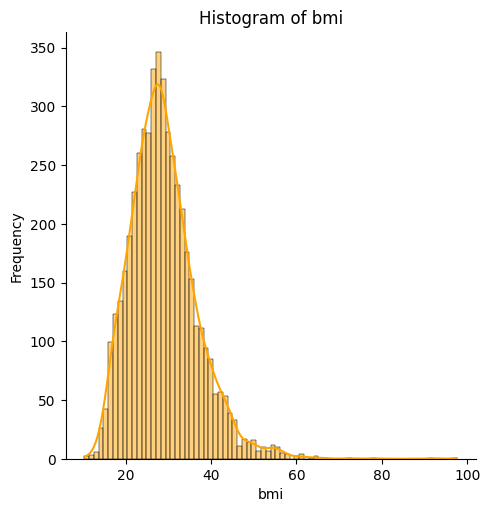

<Figure size 800x600 with 0 Axes>

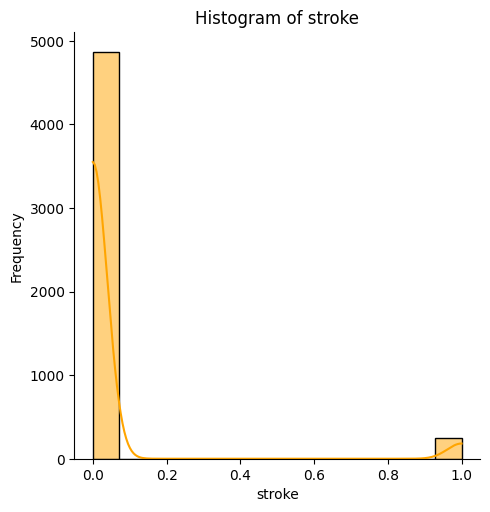

<Figure size 800x600 with 0 Axes>

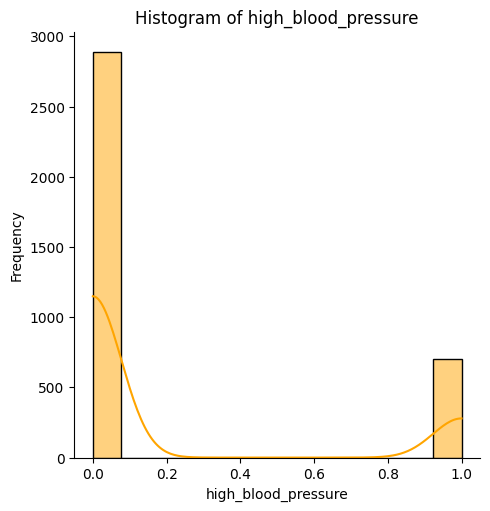

In [57]:
numeric_cols = data.select_dtypes(include = ["float64" , "int64"]).columns
for col in numeric_cols :
    plt.figure(figsize=(8,6))
    sns.displot(data = data[col], kde = True , color = "orange")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.show()

### Step 2: Handling Missing Values

In [58]:
data['work_type'].fillna(data['work_type'].mode()[0], inplace=True)
data['bmi'].fillna(data['bmi'].median(), inplace=True)
data['high_blood_pressure'].fillna(data['high_blood_pressure'].mode()[0], inplace=True)

<ipython-input-58-7047f9c3712f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['work_type'].fillna(data['work_type'].mode()[0], inplace=True)
<ipython-input-58-7047f9c3712f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [59]:
print(data.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                    0
smoking_status         0
stroke                 0
high_blood_pressure    0
dtype: int64


### Step 3: Encoding Categorical Features

In [78]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

### Step 4: Correlation Analysis

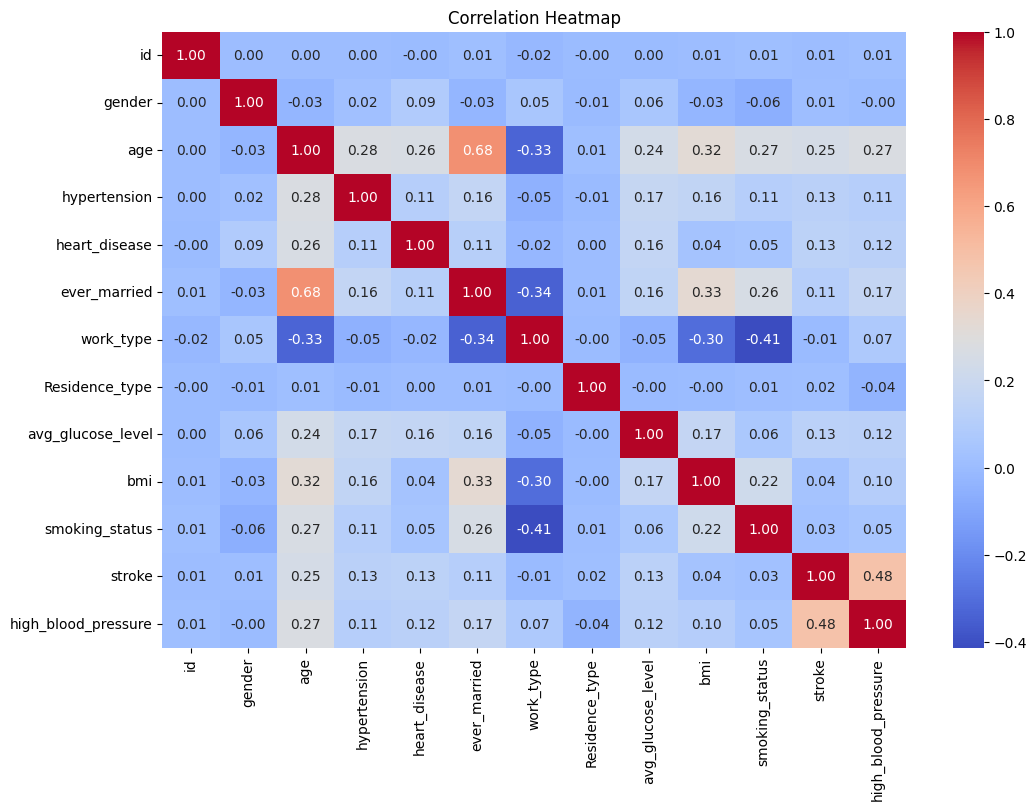

In [61]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [62]:
# Display Top Correlations with Target Column 'stroke'
print("Correlations with 'stroke':")
print(correlation_matrix['stroke'].sort_values(ascending=False))

Correlations with 'stroke':
stroke                 1.000000
high_blood_pressure    0.480422
age                    0.245257
heart_disease          0.134914
avg_glucose_level      0.131945
hypertension           0.127904
ever_married           0.108340
bmi                    0.036110
smoking_status         0.028123
Residence_type         0.015458
gender                 0.008929
id                     0.006388
work_type             -0.008471
Name: stroke, dtype: float64


### Step 5: Train-Test Split

In [63]:
X = data.drop(columns=['id', 'stroke'])  # Dropping 'id' and target column
y = data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Addressing Class Imbalance using SMOTE

In [64]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Step 6: Training a Random Forest Classifier

In [65]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [66]:
y_pred = model.predict(X_test)

In [67]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [68]:
print("Model Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Model Accuracy: 0.9628180039138943
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       972
           1       0.60      0.70      0.65        50

    accuracy                           0.96      1022
   macro avg       0.79      0.84      0.81      1022
weighted avg       0.97      0.96      0.96      1022



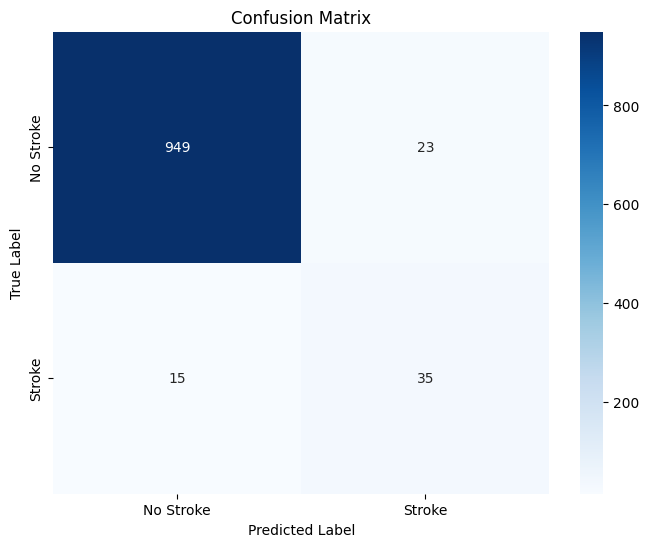

In [69]:
# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

### Step 7: Hyperparameter Tuning

In [70]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [71]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',
                           verbose=2,
                           n_jobs=-1)

In [72]:
# Fit the grid search
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [73]:
# Display the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.9804585093280652


In [74]:
# Train the model with the best parameters
best_model = grid_search.best_estimator_

Saving the model and the encoder

In [77]:
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [79]:
with open("label_encoders.pkl", "wb") as encoders_file:
    pickle.dump(label_encoders, encoders_file)